# CST 407 ML - Assignment 1 - part 2

_Code drawn from Chapter 1 – The Machine Learning landscape_


In [14]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [15]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [16]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))

    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [17]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [18]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [19]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

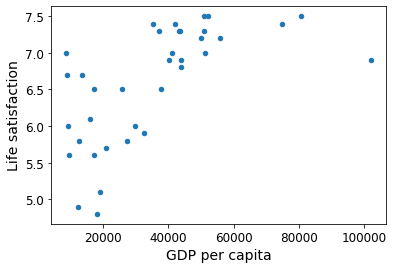

[[6.28653637]]


In [20]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

# Your turn...

Goal:  Predict life satisfaction based on country attributes (beyond GDP)

Note:  Do not modify the code above for this part.  Instead add code below that adds/modifies results.

Problem 1 Instructions:
1. Visit kaggle.com and explore data sets available for  by country
2. Find and import a data set giving population density per country
3. Evaluate the correlation between population density and life satisfaction
4. Train a model to predict life satisfaction, based on population density 
5. Measure and compare the accuracy of predictions based on population density to those based on GDP
6. Predict the life satisfaction for Cyprus, based on population density
7. How is this result different from the result obtained based on GDP?

Problem 2 Instructions:
1. Train a model to predict life satisfaction, based on both GDP and population density 
2. Measure and compare the accuracy of predictions based on both attributes to those obtained soley based on GDP or population density
3. Predict the life satisfaction for Cyprus, based on both GDP and population density
4. How is this result different from the result obtained soley based on GDP or population density?

Extra Credit:
1. Seek additional country attributes and attempt to achieve a higher accuracy in predicting life satisfaction
2. Explain your approach, results and conclusions

**Problem 1**  

In [ ]:
# load data for population density and join it with GDP / Life satisfaction


In [ ]:
# Correlate population density and life satisfaction


_"How well do population density and life satisfaction correlate?"_
    
    <type your answer here>
    

In [25]:
# Train a model to predict life satisfaction, based on population density


In [26]:
# Measure and compare the accuracy of predictions based on population density to those based on GDP


_"How accurate are predictions based on population density to those based on GDP?"_
    
    <type your answer here>
    

In [27]:
# Predict the life satisfaction for Cyprus, based on population density


_"How is this result different from the result obtained based on GDP?"_
    
    <type your answer here>
    

**Problem 2**

In [25]:
# Train a model to predict life satisfaction, based on both GDP and population density


In [28]:
# Measure and compare the accuracy of predictions based on both attributes to those obtained soley based on GDP or population density


_"How accurate are predictions based on both attributes to those obtained soley based on GDP or population density?"_
    
    <type your answer here>
    

In [27]:
# Predict the life satisfaction for Cyprus, based on both GDP and population density


_"How is this result different from the result obtained soley based on GDP or population density?"_
    
    <type your answer here>
    

**Extra Credit**

In [25]:
# your code here; feel free to add additional cells as needed


_"Explain your approach, results and conclusions."_
    
    <type your answer here>
    